In [1]:
#-------Import Test Script---------#

import uproot as up
import awkward as aw
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file = up.open("NR.root")
file.keys()

['ts;2', 'ts;1']

In [3]:
data = file["ts"]
file.classnames()

{'ts;2': 'TTree', 'ts;1': 'TTree'}

In [4]:
data.keys()


['a', 'b', 'h', 'r', 'n', 's', 'db', 'tt', 'ah']

In [5]:
branches = data.arrays()

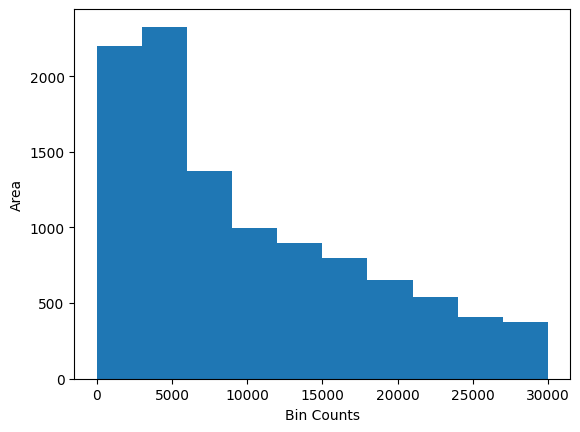

In [6]:
plt.hist(branches['a'], bins=10, range=(0,30000))
plt.ylabel('Area')
plt.xlabel('Bin Counts')
plt.show()

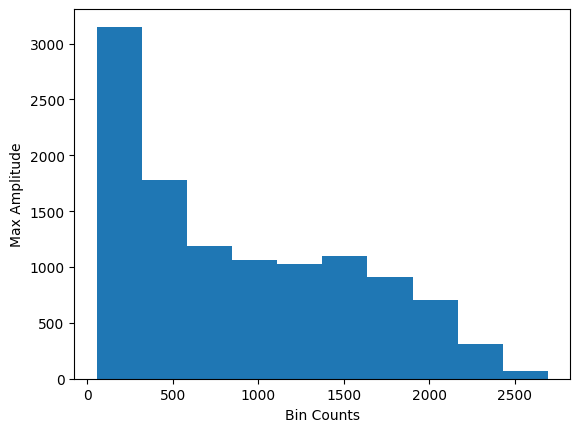

In [7]:
plt.hist(branches['h'])
plt.ylabel('Max Amplitude')
plt.xlabel('Bin Counts')
plt.show()

In [6]:
branches['a'][0]


1320.80859375

In [8]:
weakb = branches[branches.a <= 2000]

In [9]:
print(len(weakb))

998


In [10]:
print(weakb[2])

... -2.18, -0.299, 2.69, -0.273, -0.281, 0.758], db: 1.16, tt: 368, ah: 1.11e+03}


In [11]:
plt.plot(weakb['s'][4], color='green')


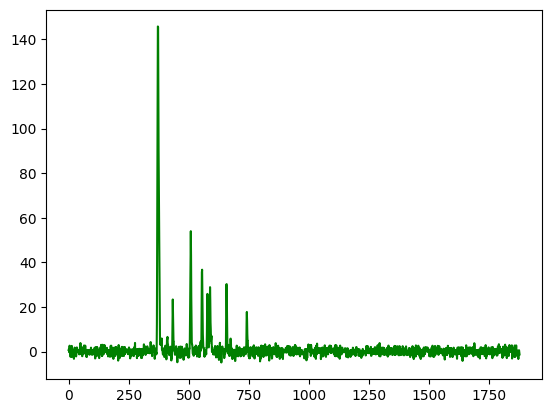

In [12]:
plt.show()

In [13]:
type(weakb['s'][2])

awkward.highlevel.Array

In [14]:
prenorm_nr = weakb['s']

In [15]:
print(prenorm_nr[2])

[0.644, 0.633, -1.33, 0.659, -0.328, -0.315, ... -0.299, 2.69, -0.273, -0.281, 0.758]


In [21]:
norm2_nr = prep.normalize(prenorm_nr)

In [22]:
print(norm2_nr[2])

[ 0.00197009  0.00193574 -0.00406714 ... -0.00083494 -0.00086033
  0.0023181 ]


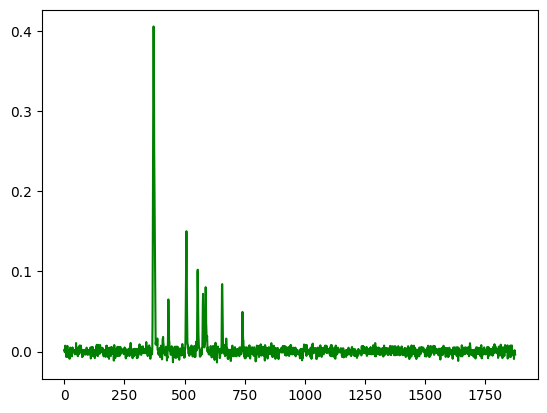

In [23]:
plt.plot(norm2_nr[4], color='green')
plt.show()

In [24]:
norma_NR = np.hstack((norm2_nr,np.ones([norm2_nr.shape[0],1], norm2_nr.dtype)))
print(norma_NR)

[[-3.05882840e-03  6.17035571e-03 -7.71695434e-03 ... -9.15815514e-03
  -2.01630636e-04  1.00000000e+00]
 [-5.31552125e-03  6.93214925e-03 -9.31476060e-03 ... -8.15369111e-03
   3.00346100e-04  1.00000000e+00]
 [ 1.97008954e-03  1.93573620e-03 -4.06713709e-03 ... -8.60327200e-04
   2.31810384e-03  1.00000000e+00]
 ...
 [ 1.10096168e-03  3.66516182e-03 -4.10194942e-03 ...  1.40028965e-03
   3.96834380e-03  1.00000000e+00]
 [-4.17562435e-03 -4.06214584e-03 -1.03861683e-04 ...  2.57346171e-03
  -5.59314399e-03  1.00000000e+00]
 [-1.26803591e-02  3.35824171e-03  3.29929071e-03 ... -3.04580143e-03
  -3.01436090e-03  1.00000000e+00]]


In [25]:
print(norma_NR[2,1876])

1.0


In [26]:
file_ER =up.open("ER.root")
file_ER.keys()

['ts;8', 'ts;7']

In [27]:
data_ER = file_ER["ts"]

data_ER.keys()

['a', 'b', 'h', 'r', 'n', 's', 'db', 'tt', 'ah']

In [28]:
branches_ER = data_ER.arrays()
branches_ER['a'][0]


28290.3984375

In [29]:
weakb_ER = branches_ER[branches_ER.a <= 2000]

In [30]:
print(len(weakb_ER))

359


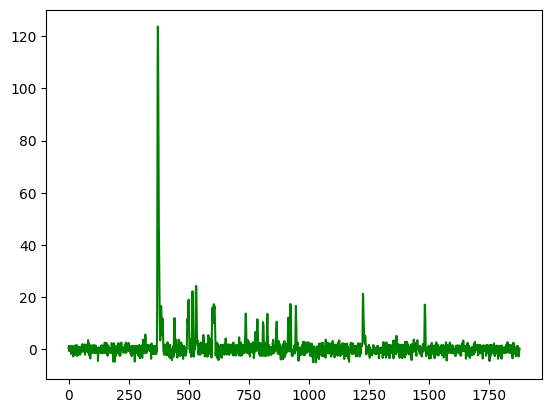

In [31]:
plt.plot(weakb_ER['s'][2], color='green')
plt.show()

In [32]:
prenorm_ER = weakb_ER['s']

In [33]:
print(prenorm_ER[2])

[0.408, 1.37, -0.615, 0.374, 0.362, 1.33, ... -2.72, 0.205, -1.79, 0.269, 0.329]


In [34]:
norm_ER = prep.normalize(prenorm_ER)

In [35]:
print(norm_ER[2])

[ 0.00141075  0.00474756 -0.00212711 ... -0.00618197  0.00092924
  0.00113874]


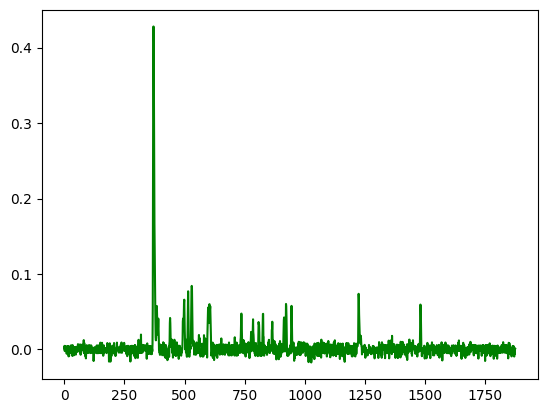

In [36]:
plt.plot(norm_ER[2], color='green')
plt.show()

In [37]:
len(norm_ER[2])

1876

In [38]:
norma_ER = np.hstack((norm_ER,np.zeros([norm_ER.shape[0],1], norm_ER.dtype)))
print(norma_ER)

[[-6.24805154e-03 -1.03940954e-02  2.72466578e-03 ...  1.36125934e-03
   9.81008505e-03  0.00000000e+00]
 [-2.35277723e-04  1.03390019e-02 -4.78486155e-04 ...  1.09100130e-02
   1.09285180e-02  0.00000000e+00]
 [ 1.41075286e-03  4.74756352e-03 -2.12711120e-03 ...  9.29238412e-04
   1.13873944e-03  0.00000000e+00]
 ...
 [-1.22694319e-02  4.53327745e-03 -2.19309485e-03 ... -5.34473907e-03
   5.05056358e-03  0.00000000e+00]
 [-3.18050216e-05  3.93388361e-03  7.80018156e-03 ... -1.00185818e-03
   2.83064693e-03  0.00000000e+00]
 [ 2.63344368e-03 -1.79335338e-03  1.12802798e-02 ... -8.44443096e-03
   9.19964167e-03  0.00000000e+00]]


In [39]:
norma_ER2 = np.square(norma_ER)

In [40]:
print(norma_ER2)

[[3.90381481e-05 1.08037218e-04 7.42380359e-06 ... 1.85302699e-06
  9.62377687e-05 0.00000000e+00]
 [5.53556068e-08 1.06894961e-04 2.28949000e-07 ... 1.19028385e-04
  1.19432506e-04 0.00000000e+00]
 [1.99022364e-06 2.25393594e-05 4.52460206e-06 ... 8.63484026e-07
  1.29672750e-06 0.00000000e+00]
 ...
 [1.50538960e-04 2.05506045e-05 4.80966503e-06 ... 2.85662358e-05
  2.55081924e-05 0.00000000e+00]
 [1.01155940e-09 1.54754403e-05 6.08428323e-05 ... 1.00371982e-06
  8.01256202e-06 0.00000000e+00]
 [6.93502560e-06 3.21611635e-06 1.27244713e-04 ... 7.13084143e-05
  8.46334069e-05 0.00000000e+00]]


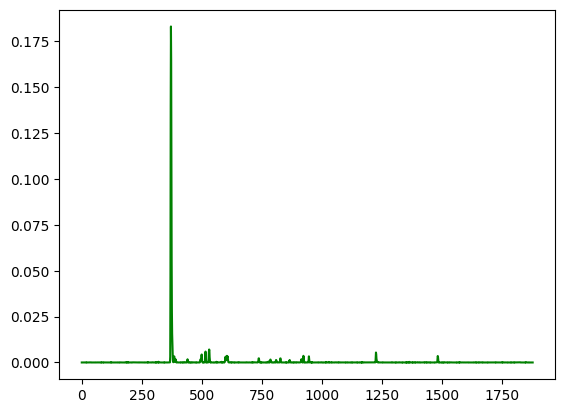

In [41]:
plt.plot(norma_ER2[2], color='green')
plt.show()

In [42]:
norma_NR2 = np.square(norma_NR)

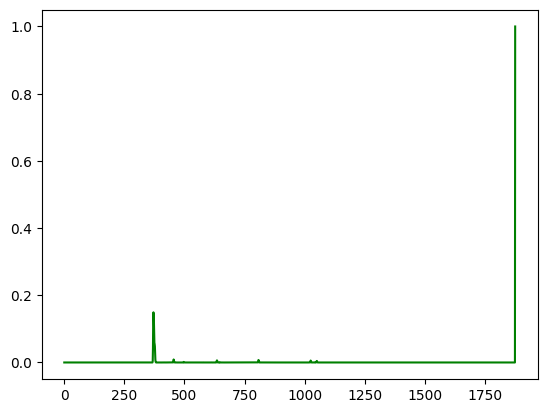

In [43]:
plt.plot(norma_NR2[2], color='green')
plt.show()

In [44]:
savetxt('NeuRec.csv', norma_NR2, delimiter=',')

In [45]:
savetxt('EleRec.csv', norma_ER2, delimiter=',')

In [46]:
len(norma_NR2)

998

In [47]:
len(norma_ER2)

359

In [55]:
prenorm_nr2 = aw.to_numpy(prenorm_nr)

In [53]:
prenorm_ER2 = aw.to_numpy(prenorm_ER)

In [56]:
Raw_ER = np.hstack((prenorm_ER2,np.zeros([prenorm_ER2.shape[0],1], prenorm_ER2.dtype)))
Raw_NR = np.hstack((prenorm_nr2,np.ones([prenorm_nr2.shape[0],1], prenorm_nr2.dtype)))

In [58]:
print(Raw_NR)

[[-0.65185547  1.3149414  -1.6445312  ... -1.9516602  -0.04296875
   1.        ]
 [-1.2875977   1.6791992  -2.2563477  ... -1.9750977   0.07275391
   1.        ]
 [ 0.64404297  0.6328125  -1.3295898  ... -0.28125     0.7578125
   1.        ]
 ...
 [ 0.41845703  1.3930664  -1.559082   ...  0.53222656  1.5083008
   1.        ]
 [-1.0600586  -1.03125    -0.02636719 ...  0.6533203  -1.4199219
   1.        ]
 [-3.150879    0.83447266  0.8198242  ... -0.75683594 -0.74902344
   1.        ]]


In [59]:
savetxt('raw_nr.csv', Raw_NR, delimiter=',')
savetxt('raw_er.csv', Raw_ER, delimiter=',')

In [2]:
file_ER_cal_1 =up.open("co57Run629846.root")
file_ER_cal_1.keys()

['t;49', 't;48']

In [3]:
data_ER_cal_1 = file_ER_cal_1["t"]
data_ER_cal_1.keys()
branches_ER_1 = data_ER_cal_1.arrays()
print(branches_ER_1.size())

[{a: 3.28e+04, h: 1.5e+03, r: 0.331, n: 1876, s: [, ... tt: 370, ah: 2.09e+03}]


In [4]:
print(branches_ER_1[1])

... 0.322, -1.55, 2.38, 0.393, -2.63, -0.648], db: 1.37, tt: 369, ah: 4.42e+03}


In [4]:
#file_ER_cal_2 =up.open("ER_cal_2.root")
#file_ER_cal_2.keys()

['ts;6', 'ts;5']

In [5]:
#data_ER_cal_2 = file_ER_cal_2["ts"]
#branches_ER_2 = data_ER_cal_2.arrays()

In [6]:
full_ER_cal = branches_ER_1['s']

In [7]:
print(type(full_ER_cal))

<class 'awkward.highlevel.Array'>


In [9]:
new_full_ER = aw.to_numpy(full_ER_cal)
print(new_full_ER[0])

[ 0.14674023 -0.81208634  0.16538753 ...  3.6909697  -0.3925823
  0.55309385]


In [10]:
new_new = pd.DataFrame(new_full_ER)

print(new_new)

            0         1         2         3         4         5         6     \
0       0.146740 -0.812086  0.165388  0.162759 -1.771678  1.181406 -0.777421   
1      -0.153543  1.783818 -2.132245  0.819558 -3.072114  1.855298 -0.119251   
2      -0.926315  1.998319  0.976947 -1.961790 -0.964228  0.028842 -0.943992   
3      -2.116836  0.853812 -0.141202  0.839394 -1.111817  1.814785  0.805330   
4       0.092636  0.087907  2.034397 -0.936235 -0.916816 -0.897398 -0.877979   
...          ...       ...       ...       ...       ...       ...       ...   
207063 -2.573920 -0.542762 -2.472772 -0.470975 -0.439575  0.547781 -1.386723   
207064 -1.279414  0.707617 -0.300617 -0.289196  1.644084  0.631357  0.608682   
207065 -0.212552  0.756845  1.711799  0.691144 -2.246634 -0.252848 -0.249113   
207066 -1.189434  1.766429  0.756631 -1.194680 -0.180330 -4.039301 -0.054798   
207067  0.921579  0.915464 -0.076211 -0.067885 -0.059559 -0.051233  0.922997   

            7         8         9     .

In [12]:
area_ER_cal = branches_ER_1['a']
area_ER_cal = aw.to_numpy(area_ER_cal)
new_new[1876]= area_ER_cal
print(area_ER_cal)

[32793.414  16537.56    6959.1143 ... 37854.977   2592.337   8072.0312]


In [13]:
print(new_new)

            0         1         2         3         4         5         6     \
0       0.146740 -0.812086  0.165388  0.162759 -1.771678  1.181406 -0.777421   
1      -0.153543  1.783818 -2.132245  0.819558 -3.072114  1.855298 -0.119251   
2      -0.926315  1.998319  0.976947 -1.961790 -0.964228  0.028842 -0.943992   
3      -2.116836  0.853812 -0.141202  0.839394 -1.111817  1.814785  0.805330   
4       0.092636  0.087907  2.034397 -0.936235 -0.916816 -0.897398 -0.877979   
...          ...       ...       ...       ...       ...       ...       ...   
207063 -2.573920 -0.542762 -2.472772 -0.470975 -0.439575  0.547781 -1.386723   
207064 -1.279414  0.707617 -0.300617 -0.289196  1.644084  0.631357  0.608682   
207065 -0.212552  0.756845  1.711799  0.691144 -2.246634 -0.252848 -0.249113   
207066 -1.189434  1.766429  0.756631 -1.194680 -0.180330 -4.039301 -0.054798   
207067  0.921579  0.915464 -0.076211 -0.067885 -0.059559 -0.051233  0.922997   

            7         8         9     .

In [22]:
ER_final = new_new[(new_new[1876] < 5000) & (new_new[1876] > 3000) ]
print(ER_final)

            0         1         2         3         4         5         6     \
117     0.537951  0.540053 -1.409307 -0.402711 -0.386167  0.596280  0.598382   
124    -0.536892  2.413002 -1.520131 -0.516963  1.447615 -0.509666  0.479060   
133     0.454080 -0.528356  1.430722 -0.551471  0.441945  0.445068  0.438242   
146    -0.192238  0.788264 -0.216551  0.764193 -0.230673  0.750071 -2.176602   
169     1.029406  0.032632 -1.905656  1.063231  0.066457 -1.852419  1.096570   
...          ...       ...       ...       ...       ...       ...       ...   
206876  0.345778  0.337050  0.328322  1.275791 -2.610751  1.306873 -0.667273   
206937 -1.265091 -0.242021 -2.180120 -1.162020 -1.114318  0.864950 -1.087348   
206958 -0.323980  1.636182  0.611028  0.605529 -0.385528  0.589318  1.549723   
207055  0.003377  0.959733 -1.005526 -0.980735 -0.955943  1.010362  0.020712   
207061 -1.014142 -1.951120 -0.941849  1.038539 -0.922587  2.013756 -1.903324   

            7         8         9     .

In [13]:
#condition = np.bitwise_and(area_ER_cal>1, area_ER_cal<2000)
#print(condition)

[False, False, False, False, False, False, ... False, False, False, False, False]


In [23]:
ER_final = ER_final.drop(ER_final.columns[1876], axis=1)
ER_final = ER_final.reset_index(drop=True)
print(ER_final)

          0         1         2         3         4         5         6     \
0     0.537951  0.540053 -1.409307 -0.402711 -0.386167  0.596280  0.598382   
1    -0.536892  2.413002 -1.520131 -0.516963  1.447615 -0.509666  0.479060   
2     0.454080 -0.528356  1.430722 -0.551471  0.441945  0.445068  0.438242   
3    -0.192238  0.788264 -0.216551  0.764193 -0.230673  0.750071 -2.176602   
4     1.029406  0.032632 -1.905656  1.063231  0.066457 -1.852419  1.096570   
...        ...       ...       ...       ...       ...       ...       ...   
3661  0.345778  0.337050  0.328322  1.275791 -2.610751  1.306873 -0.667273   
3662 -1.265091 -0.242021 -2.180120 -1.162020 -1.114318  0.864950 -1.087348   
3663 -0.323980  1.636182  0.611028  0.605529 -0.385528  0.589318  1.549723   
3664  0.003377  0.959733 -1.005526 -0.980735 -0.955943  1.010362  0.020712   
3665 -1.014142 -1.951120 -0.941849  1.038539 -0.922587  2.013756 -1.903324   

          7         8         9     ...      1866      1867    

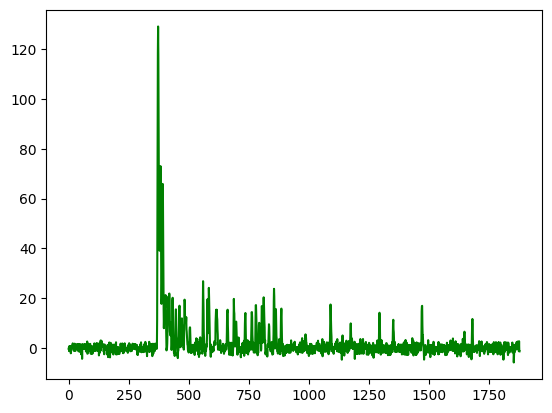

In [30]:

row = ER_final.iloc[1000]

plt.plot(row, color='green')
plt.show()

In [2]:
file_NR_cal_1 =up.open("ambeRun628793.root")
file_NR_cal_1.keys()

['t;15', 't;14']

In [3]:
data_NR_cal_1 = file_NR_cal_1["t"]
data_NR_cal_1.keys()

['a', 'h', 'r', 'n', 's', 'db', 'tt', 'ah']

In [4]:
branches_NR_1 = data_NR_cal_1.arrays()

In [3]:
#file_NR_cal_2 =up.open("NR_cal_2.root")
#data_NR_cal_2 = file_NR_cal_2["ts"]
#branches_NR_2 = data_NR_cal_2.arrays()

In [7]:
full_NR_cal = branches_NR_1['s']
new_new_NR = pd.DataFrame(full_NR_cal)

In [8]:
area_NR_cal = branches_NR_1['a']
area_NR_cal = aw.to_numpy(area_NR_cal)
new_new_NR[1876]= area_NR_cal
print(new_new_NR)

           0         1         2         3         4         5         6     \
0     -0.427437  1.535168  1.497772 -0.481136  0.515322 -1.459094 -0.447951   
1      0.342548 -2.568715 -0.558362  1.403452 -2.507811  0.487857 -1.477400   
2      0.086135  1.045427 -1.902456  0.081225  0.074856  0.068486  1.037726   
3     -2.861916  1.117693  0.121691 -0.849920 -0.811825  0.191931 -0.779923   
4     -3.327627  1.617195  2.557523  1.522242 -1.420457  0.548755 -0.428040   
...         ...       ...       ...       ...       ...       ...       ...   
61498 -0.804526  0.186041 -1.754956 -1.705902  1.260275 -1.680722 -0.656058   
61499  0.900092  1.834539  0.803325 -2.135306  0.823289 -0.183778 -0.190844   
61500 -0.405695 -0.383094 -0.370442  0.608114 -0.378991  0.609514  0.598018   
61501 -0.434845 -1.374239 -1.343236  0.639228 -0.343968  1.614349  0.616711   
61502 -0.724918  3.182134  1.147915 -0.827817 -0.813498  0.176431  1.132263   

           7         8         9     ...      1867 

In [9]:
NR_final = new_new_NR[(new_new_NR[1876] < 3000) & (new_new_NR[1876] > 750) ]

In [10]:
NR_final = NR_final.drop(NR_final.columns[1876], axis=1)
NR_final = NR_final.reset_index(drop=True)
print(NR_final)

          0         1         2         3         4         5         6     \
0    -2.861916  1.117693  0.121691 -0.849920 -0.811825  0.191931 -0.779923   
1    -0.493319 -1.460080 -2.383039 -0.394088 -0.375533  1.564880  0.559288   
2    -0.504258 -0.493643 -1.439226  0.517396 -0.462040  0.524185  0.500704   
3    -0.422043  2.503975 -0.467475 -0.468529 -1.425538 -0.426592  0.557913   
4     0.299492  2.232020  0.232982 -0.732202 -1.692893  0.278223 -1.681982   
...        ...       ...       ...       ...       ...       ...       ...   
6543 -0.565344  0.416692  0.418383 -1.531388  0.440700 -0.533218  1.424428   
6544  1.647152 -0.340328 -0.337756  0.640425 -0.366710  1.577618 -1.365817   
6545  0.786354  0.766403  0.746451 -2.180917 -0.186669  2.724945 -0.260667   
6546 -0.368658  0.613238  1.561038 -0.422727 -2.348248  1.579654 -0.413817   
6547  0.900092  1.834539  0.803325 -2.135306  0.823289 -0.183778 -0.190844   

          7         8         9     ...      1866      1867    

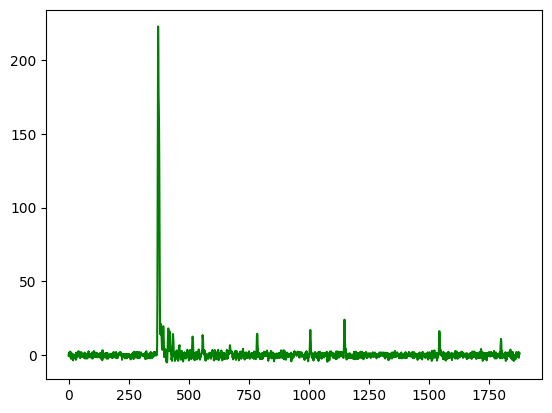

In [16]:

row_NR =NR_final.iloc[5111]

plt.plot(row_NR, color='green')
plt.show()

In [17]:
NR_final.to_csv('ambeRun_neu.csv')

In [27]:
ER_final.to_csv('coRun57_ele.csv')

In [8]:
wav_start = pd.read_csv("filt_nr.csv", header=None)

In [9]:
wav_start

,0,1,2,3,4,5,6,7,8,9,...,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876
0,-1.290,1.6800,-2.260,0.7350,0.7270,-0.258,-1.2200,2.7300,-0.2590,-1.220,...,1.160,0.168,1.250,-0.7830,0.14500,-1.930,-1.020,-1.980,0.0728,1.0
1,0.644,0.6330,-1.330,0.6590,-0.3280,-0.315,-0.3020,-0.2890,0.7000,0.688,...,-0.168,-0.242,1.750,-2.1800,-0.29900,2.690,-0.273,-0.281,0.7580,1.0
2,0.715,0.6970,-0.298,0.6840,2.6200,0.597,1.5500,0.5350,-2.4100,1.550,...,-0.448,-0.431,-1.380,-3.3500,-1.45000,0.569,0.547,-0.340,-1.3100,1.0
3,0.177,1.1500,-0.834,1.1400,0.1300,1.100,0.0947,0.0894,-1.8700,-1.820,...,-0.706,0.271,0.210,-2.7400,0.31400,-0.586,-1.610,-1.630,-0.7050,1.0
4,-0.911,0.0972,-0.871,-0.8380,-2.7600,0.251,-0.7160,0.2920,-1.6500,3.280,...,-2.100,-1.030,2.890,-0.1110,-1.12000,-1.120,-0.170,-1.130,1.8600,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.199,1.1700,-1.790,-0.7660,-0.7460,-0.726,-1.6800,0.3140,0.3100,2.260,...,-1.290,-0.309,2.600,-0.3440,1.68000,-2.260,-1.370,1.820,0.7270,1.0
296,-1.180,-0.1750,0.801,0.7770,-0.2220,1.730,-1.2500,-0.2440,-1.2200,-0.219,...,1.420,-0.572,-0.597,-0.6240,-0.65300,-0.685,-0.763,-0.907,1.3000,1.0
297,2.170,1.1300,0.112,0.0962,0.0806,-0.910,1.0500,-0.9410,0.0435,1.000,...,0.105,-0.926,2.080,0.0405,0.00195,-0.998,-0.955,-0.619,-1.0500,1.0
298,-0.896,0.0967,-4.900,0.0947,0.0933,1.070,1.0400,1.0200,-1.9400,-0.915,...,1.580,1.500,-3.520,1.5100,-1.42000,-0.392,0.600,-3.630,0.4360,1.0


In [35]:
trans_wav = wav_start.T
trans_wav

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-1.2900,0.644,0.715,0.177,-0.9110,-0.616,0.0776,0.260,-2.0300,-1.1300,...,-1.470,-1.350,-0.277,-0.272,-2.470,0.199,-1.180,2.1700,-0.8960,-1.680
1,1.6800,0.633,0.697,1.150,0.0972,0.375,2.0300,1.230,-0.0239,-0.1310,...,1.490,-1.300,0.705,2.660,-0.455,1.170,-0.175,1.1300,0.0967,-1.640
2,-2.2600,-1.330,-0.298,-0.834,-0.8710,0.366,-0.9530,-3.690,0.9560,2.7900,...,-0.496,-0.282,-1.260,-1.320,-0.443,-1.790,0.801,0.1120,-4.9000,0.356
3,0.7350,0.659,0.684,1.140,-0.8380,0.356,-1.9100,1.280,-2.9700,0.7610,...,-0.483,0.716,1.700,-0.316,0.543,-0.766,0.777,0.0962,0.0947,-3.550
4,0.7270,-0.328,2.620,0.130,-2.7600,1.320,-0.8860,0.271,1.0100,-1.2200,...,1.480,-1.240,-0.288,0.661,2.480,-0.746,-0.222,0.0806,0.0933,1.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,-1.9300,2.690,0.569,-0.586,-1.1200,-1.010,-1.1200,-0.851,-0.4690,0.1080,...,-0.102,-2.720,-0.765,-2.090,-0.132,-2.260,-0.685,-0.9980,-0.3920,-1.200
1873,-1.0200,-0.273,0.547,-1.610,-0.1700,0.947,-1.1700,1.160,1.5100,0.1630,...,0.895,2.290,1.200,1.950,-0.228,-1.370,-0.763,-0.9550,0.6000,0.755
1874,-1.9800,-0.281,-0.340,-1.630,-1.1300,-2.010,-2.2700,0.171,0.5270,-2.8200,...,-0.309,-0.174,-1.040,-1.230,-0.299,1.820,-0.907,-0.6190,-3.6300,-1.460
1875,0.0728,0.758,-1.310,-0.705,1.8600,-0.145,0.8540,0.185,1.5000,0.0962,...,-0.114,-1.730,3.270,2.000,-1.160,0.727,1.300,-1.0500,0.4360,0.656


In [11]:
window = 4e-9

In [36]:
trans_wav = trans_wav.drop(1876)
trans_wav.insert(0, 'Time', np.linspace(0,7504e-9, num=1876))
print(trans_wav)

              Time       0      1      2      3       4      5       6  \
0     0.000000e+00 -1.2900  0.644  0.715  0.177 -0.9110 -0.616  0.0776   
1     4.002133e-09  1.6800  0.633  0.697  1.150  0.0972  0.375  2.0300   
2     8.004267e-09 -2.2600 -1.330 -0.298 -0.834 -0.8710  0.366 -0.9530   
3     1.200640e-08  0.7350  0.659  0.684  1.140 -0.8380  0.356 -1.9100   
4     1.600853e-08  0.7270 -0.328  2.620  0.130 -2.7600  1.320 -0.8860   
...            ...     ...    ...    ...    ...     ...    ...     ...   
1871  7.487991e-06  0.1450 -0.299 -1.450  0.314 -1.1200  0.943 -1.0400   
1872  7.491994e-06 -1.9300  2.690  0.569 -0.586 -1.1200 -1.010 -1.1200   
1873  7.495996e-06 -1.0200 -0.273  0.547 -1.610 -0.1700  0.947 -1.1700   
1874  7.499998e-06 -1.9800 -0.281 -0.340 -1.630 -1.1300 -2.010 -2.2700   
1875  7.504000e-06  0.0728  0.758 -1.310 -0.705  1.8600 -0.145  0.8540   

           7       8  ...    290    291    292    293    294    295    296  \
0     0.2600 -2.0300  ... -1.470 

In [24]:
times = trans_wav['Time'].values
n_measurements = len(times)
timespan_seconds = times[-1] - times[0]
sample_rate_hz = int(n_measurements / timespan_seconds)

print(n_measurements)
print(timespan_seconds)
print(sample_rate_hz)

1876
7.504e-06
250000000


In [ ]:
number_of_columns = 1877

for i in range(1, number_of_columns):
    sf.write("nr_wave{0}.wav".format(i+1), trans_wav['Time'], sample_rate_hz)

In [23]:
import sys
sys.path.insert(0, "/tf/APPS/root/lib/")
#sys.path.append("APPS/root/lib")
import ctypes
ctypes.cdll.LoadLibrary('/tf/APPS/root/lib/libCore.so')
ctypes.cdll.LoadLibrary('/tf/APPS/root/lib/libThread.so')
ctypes.cdll.LoadLibrary('/tf/APPS/root/lib/libImt.so')
ctypes.cdll.LoadLibrary('/tf/APPS/root/lib/libRIO.so')
ctypes.cdll.LoadLibrary('/tf/APPS/root/lib/libNet.so')
ctypes.cdll.LoadLibrary('/tf/APPS/root/lib/libTree.so')
ctypes.cdll.LoadLibrary('/tf/APPS/root/lib/libMathCore.so')
ctypes.cdll.LoadLibrary('/tf/APPS/root/lib/libMatrix.so')
ctypes.cdll.LoadLibrary('/tf/APPS/root/lib/libHist.so')
ctypes.cdll.LoadLibrary('/tf/APPS/root/lib/libGraf.so')
import pyroot
import ROOT

ImportError: libpython2.7.so.1.0: cannot open shared object file: No such file or directory